# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Предобработка данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значением (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

In [192]:
#дедлайн 23 октября 23:59

In [38]:
#Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)

1. school - школа (Бинарный признак: "GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)

2. sex - пол (Бинарный признак: "F" - женский или "M" - мужской)

3. age - возраст (Порядковый признак: от 15 до 22)

4. address - тип местности проживания ученика (Бинарный признак: "U" - Городская местность или "R" - Сельская местность)

5. famsize - количество людей в семье (Бинарный признак: "LE3" - (<=3) человек или "GT3" - (>3) человек)

6. Pstatus - сожительство родителей (Бинарный признак: "T" - родители живут вместе или "A" - родители живут раздельно)

7. Medu - образование матери (Порядковый признак: 0 - Без образования, 1 - начальное образование (до 4го класса), 2 – с 5го по 6й класс, 3 – среднее образование or 4 – высшее образование)

8. Fedu - образование отца (Порядковый признак: 0 - Без образования, 1 - начальное образование (до 4го класса), 2 – с 5го по 6й класс, 3 – среднее образование or 4 – высшее образование)

9. Mjob - работа матери (Номинальный признак: "teacher", "health" связанная с уходом, государственная служба "services" (пример: административаня или полиция), "at_home" или "other")

10. Fjob - работа отца (Номинальный признак: "teacher", "health" связанная с уходом, государственная служба "services" (пример: административаня или полиция), "at_home" или "other")

11. reason - причины поступить в эту школу (Номинальный признак: close to "home", school "reputation", "course" preference or "other")

12. guardian - законный представитель ученика (Номинальный признак: "mother", "father" or "other")

13. traveltime - время на дорогу от дома до школы (Порядковый признак: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14. studytime - время, которое тратится на обучение в неделю (Порядковый признак: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15. failures - количество несданных предметов (Порядковый признак: n if 1<=n<3, else 4)

16. schoolsup - дополнительная учебная поддержка (Бинарный признак: yes или no)

17. famsup -  семейная учебная поддержка (Бинарный признак: yes or no)

18. paid - дополнительные оплачиваемые занятия по предмету курса (Math or Portuguese) (Бинарный признак: yes or no)

19. activities -  внеучебные занятия (Бинарный признак: yes or no)

20. nursery - посещал детский сад (Бинарный признак: yes or no)

21. higher - желание получить высшее образование (Бинарный признак: yes or no)

22. internet - доступ к Интернету дома (Бинарный признак: yes or no)

23. romantic - наличие романтических отношений (Бинарный признак: yes or no)

24. famrel - качество семейных отношений (Порядковый признак: from 1 - very bad to 5 - excellent)

25. freetime - наличие свободного времени после школы (Порядковый признак: from 1 - very low to 5 - very high)

26. goout - проведение времени с друзьями (Порядковый признак: from 1 - very low to 5 - very high)

27. Dalc - потребление алкоголя в течение рабочего дня (Порядковый признак: from 1 - very low to 5 - very high)

28. Walc - потребление алкоголя в выходные дни (Порядковый признак: from 1 - very low to 5 - very high)

29. health - текущее состояние здоровья (Порядковый признак: from 1 - very bad to 5 - very good)

30. absences - количество пропусков школы (Порядковый признак: from 0 to 93)

31. G1 - оценка в первом учебном году (Порядковый признак: from 0 to 20)

32. G2 - оценка во втором учебном году (Порядковый признак: from 0 to 20)

33. G3 - результирующая оценка (Порядковый признак: from 0 to 20, output target)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from math import exp


In [40]:
d1 = pd.read_csv("/Users/AliceP/Desktop/IAD/3kurs/dz2/student-mat.csv", sep=';')
d2 = pd.read_csv("/Users/AliceP/Desktop/IAD/3kurs/dz2/student-por.csv", sep=';')

In [41]:
d2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [42]:
d3 = pd.merge(d1, d2, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [43]:
d3.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [59]:
# но потом семинарист в телеграмме сказал использовать student-por.csv

In [46]:
#Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)

In [45]:
d2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


пропусков нет

In [47]:
#Подсчитайте количество людей, у которых матери с образованием "0" (0.4)

d2['Medu'].value_counts()

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

6 человек

In [ ]:
# Преобразуйте все номинальные признаки в несколько признаков с бинарным значением (0.4) 

номинальные признаки:

1. Mjob - работа матери (Номинальный признак: "teacher", "health" связанная с уходом, государственная служба "services" (пример: административаня или полиция), "at_home" или "other")
2. Fjob - работа отца (Номинальный признак: "teacher", "health" связанная с уходом, государственная служба "services" (пример: административаня или полиция), "at_home" или "other")
3. reason - причины поступить в эту школу (Номинальный признак: close to "home", school "reputation", "course" preference or "other")
4. guardian - законный представитель ученика (Номинальный признак: "mother", "father" or "other")

In [48]:
d2 = pd.get_dummies(d2, columns = ["Mjob","Fjob","reason","guardian"])

In [49]:
d2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


1. school - "GP"= 1,  "MS" = 0
2. sex - "F" = 1, "M" = 0
3. address - "U" = 1, "R" = 0
4. famsize - "LE3" = 1 , "GT3" = 0
5. Pstatus - "T" = 1,  "A" = 0
6. schoolsup - yes =1, no = 0
7. famsup - yes =1, no = 0
8. paid - yes =1, no = 0
9. activities - yes =1, no = 0
10. nursery - yes =1, no = 0
11. higher - yes =1, no = 0
12. internet - yes =1, no = 0
13. romantic - yes =1, no = 0


In [54]:
d2.at[d2['school'] == 'GP', 'school'] = 1
d2.at[d2['school'] == 'MS', 'school'] = 0

d2.at[d2['sex'] == 'F', 'sex'] = 1
d2.at[d2['sex'] == 'M', 'sex'] = 0

d2.at[d2['address'] == 'U', 'address'] = 1
d2.at[d2['address'] == 'R', 'address'] = 0

d2.at[d2['famsize'] == 'LE3', 'famsize'] = 1
d2.at[d2['famsize'] == 'GT3', 'famsize'] = 0

d2.at[d2['Pstatus'] == 'T', 'Pstatus'] = 1
d2.at[d2['Pstatus'] == 'A', 'Pstatus'] = 0

d2.at[d2['schoolsup'] == 'yes', 'schoolsup'] = 1
d2.at[d2['schoolsup'] == 'no', 'schoolsup'] = 0

d2.at[d2['famsup'] == 'yes', 'famsup'] = 1
d2.at[d2['famsup'] == 'no', 'famsup'] = 0

d2.at[d2['paid'] == 'yes', 'paid'] = 1
d2.at[d2['paid'] == 'no', 'paid'] = 0

d2.at[d2['activities'] == 'yes', 'activities'] = 1
d2.at[d2['activities'] == 'no', 'activities'] = 0

d2.at[d2['nursery'] == 'yes', 'nursery'] = 1
d2.at[d2['nursery'] == 'no', 'nursery'] = 0

d2.at[d2['higher'] == 'yes', 'higher'] = 1
d2.at[d2['higher'] == 'no', 'higher'] = 0

d2.at[d2['internet'] == 'yes', 'internet'] = 1
d2.at[d2['internet'] == 'no', 'internet'] = 0

d2.at[d2['romantic'] == 'yes', 'romantic'] = 1
d2.at[d2['romantic'] == 'no', 'romantic'] = 0


In [194]:
#p.s я не знаю как это сделать проще, этот способ я взяла отсюда: http://mlbootcamp.ru/article/tutorial/
# на случай плагиата

In [55]:
d2.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
5,1,0,16,1,1,1,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0
6,1,0,16,1,1,1,2,2,1,2,...,1,0,0,0,1,0,0,0,1,0


In [37]:
#Используя объект SelectKBest с параметром f_regression выберите два признака, 
#которые наиболее сильно связаны с признаком G3 (0.5)

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

In [74]:
data1 = d2.drop('G3',1)

In [84]:
selector = SelectKBest(f_regression, k=2)
b = selector.fit_transform(data1, d2["G3"])

In [85]:
print b

[[  0.  11.]
 [  9.  11.]
 [ 12.  13.]
 ..., 
 [ 11.  12.]
 [ 10.  10.]
 [ 10.  11.]]


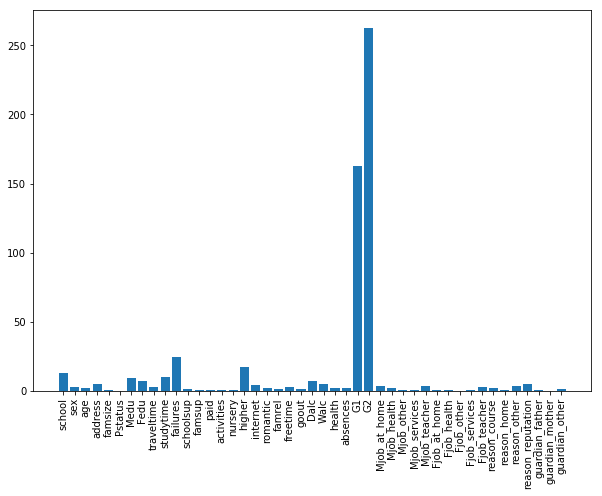

In [87]:
scores = -np.log10(selector.pvalues_)
plt.figure(figsize=(10,7))
plt.bar(range(45), scores)
plt.xticks(range(45), data1, rotation='vertical')
plt.show()


In [195]:
#p.s аналогично с этим https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# на случай плагиата

Ответ: лучшие признаки G2 и G1

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

In [88]:
from sklearn.linear_model import RidgeCV

In [120]:
X = d2["G2"]
y = d2["G3"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=12345)

In [122]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

C:\Users\AliceP\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\AliceP\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\AliceP\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
C:\Users\AliceP\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [96]:
clf = RidgeCV(alphas=np.logspace(-10,10,1000),cv=6) #np.logspace(-3,6,100)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [97]:
clf.alpha_

12.915496650148826

In [99]:
#Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)

In [101]:
from sklearn import metrics

In [104]:
MAE = metrics.mean_absolute_error(y_test,pred)
MSE = metrics.mean_squared_error(y_test, pred)
MedAE = metrics.median_absolute_error(y_test,pred)
R2 = metrics.r2_score(y_test,pred)

In [105]:
print(MAE)
print(MSE)
print(MedAE)
print(R2)

0.873853131707
2.33148963661
0.624232733561
0.778368307212


In [106]:
#Создайте объекты SGDRegressor, используя все возможных варианты аргумента penalty (0.2)

In [107]:
from sklearn.linear_model import SGDRegressor

In [147]:
penalties = ['none','l2','l1','elasticnet']
SGD_r2=[]
for penalty in penalties:
    SGD = SGDRegressor(penalty = penalty)
    SGD.fit(X_train,y_train)
    y_pred = SGD.predict(X_test)
    print("penalty: ",penalty)
    print(metrics.r2_score(y_test, y_pred))
    SGD_r2.append(metrics.r2_score(y_test,y_pred))
    

('penalty: ', 'none')
0.771288347183
('penalty: ', 'l2')
0.777902724875
('penalty: ', 'l1')
0.781048510003
('penalty: ', 'elasticnet')
0.73288471294


In [131]:
#Создайте объекты с параметрами max_depth = 1,3,10 GradientBoostingRegressor и 
#для каждого объекта изменяйте количество n_estimators от 100 до 1000 с шагом 100 (0.2)
#Подсчитайте метрику r2 score для всех объектов (0.1)
#Визуализируйте зависимость R2 oт n_estimators на графике (0.2)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
md = [1,3,10]
metric_r2 = []
for max_depth in md:
    t = []
    for n_estimators in range(100,1100,100):
        GBR = GradientBoostingRegressor(max_depth=max_depth,n_estimators=n_estimators)
        GBR.fit(X_train,y_train)
        y_pred = GBR.predict(X_test)
        t.append(metrics.r2_score(y_test,y_pred))
    metric_r2.append(t)

In [130]:
metric_r2

[[0.76887133388390405,
  0.77041070436704717,
  0.76986059594821277,
  0.76946814651585127,
  0.7692125094401252,
  0.7690511446103383,
  0.76893939821664725,
  0.76885712639227233,
  0.76880774536245,
  0.76877225727697118],
 [0.7687190750909435,
  0.76870613089213502,
  0.76870612661594917,
  0.76870612661466708,
  0.76870612661466686,
  0.76870612661466686,
  0.76870612661466686,
  0.76870612661466686,
  0.76870612661466686,
  0.76870612661466686],
 [0.76870387237049509,
  0.76870612655480386,
  0.76870612661466509,
  0.76870612661466664,
  0.76870612661466664,
  0.76870612661466664,
  0.76870612661466664,
  0.76870612661466664,
  0.76870612661466664,
  0.76870612661466664]]

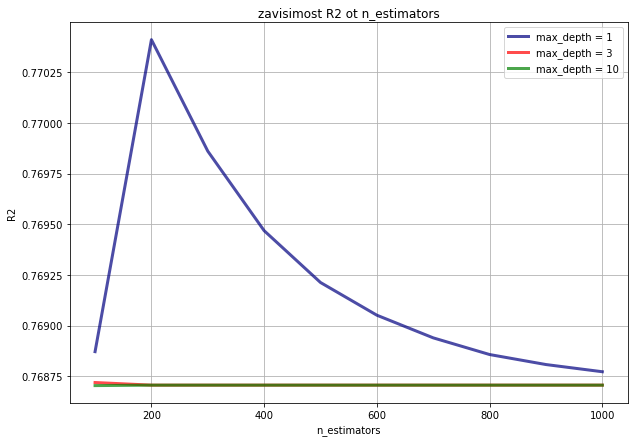

In [134]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(100,1100,100), metric_r2[0], color='navy', lw=3, label='max_depth = 1',alpha=0.7)
plt.plot(np.arange(100,1100,100), metric_r2[1], color='red', lw=3, label='max_depth = 3',alpha=0.7)
plt.plot(np.arange(100,1100,100), metric_r2[2], color='green', lw=3, label='max_depth = 10',alpha=0.7)
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.title('zavisimost R2 ot n_estimators')
plt.grid('on')
plt.legend()
plt.show()

In [111]:
#Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

In [115]:
#семинарист сказал, использовать регрессоры, которые были указны выше

In [141]:
#находим лучший регрессор по 1 признаку, как написано в задании

In [158]:
#MSE для RidgeCV 

RidgeCV MSE = 2.33148963661 (посчитали выше)

In [143]:
# MSE для SGDRegressor

In [148]:
penalties = ['none','l2','l1','elasticnet']
SGD_mse=[]
for penalty in penalties:
    SGD = SGDRegressor(penalty = penalty)
    SGD.fit(X_train,y_train)
    y_pred = SGD.predict(X_test)
    print("penalty: ",penalty)
    print(metrics.mean_squared_error(y_test, y_pred))
    SGD_mse.append(metrics.mean_squared_error(y_test,y_pred))

('penalty: ', 'none')
2.3941851669
('penalty: ', 'l2')
2.30413172091
('penalty: ', 'l1')
2.31262075494
('penalty: ', 'elasticnet')
2.31998236518


In [155]:
min(SGD_mse)

2.3041317209086514

In [150]:
# MSE для GradientBoostingRegressor

In [153]:
md = [1,3,10]
metric_mse = []
for max_depth in md:
    k = []
    for n_estimators in range(100,1100,100):
        GBR = GradientBoostingRegressor(max_depth=max_depth,n_estimators=n_estimators)
        GBR.fit(X_train,y_train)
        y_pred = GBR.predict(X_test)
        k.append(metrics.mean_squared_error(y_test,y_pred))
    metric_mse.append(k)

In [157]:
min(min(metric_mse))

2.4152008979917796

в итоге наименьший MSE у SGDRegressor 2.3041317209086514 , penalty: l2

### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использованием объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
d2["Alc"]=(d2["Walc"]*2+d2["Dalc"]*5)/7

In [160]:
d2["Alc"].head()

0    1.000000
1    1.000000
2    2.285714
3    1.000000
4    1.285714
Name: Alc, dtype: float64

In [161]:
#Alc becomes a binary value if is lower than 3 is 0, that means you are not a drinker, otherwise 1.
d2.at[d2["Alc"] < 3, "Alc"] = 0
d2.at[d2["Alc"] >= 3 , "Alc"] = 1

In [168]:
#If a student frequently make absence in school, he takes more  alcohol than others. 
#Therefore this attribute becomes a binary value, if he frequently make absence ( Over 10 days) is 0, otherwise value is 1. 
d2.at[d2["absences"] <= 10,"absences"] = 1
d2.at[d2["absences"] >10, "absences"] = 0

In [162]:
d2.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Alc
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,...,-0.024570,-0.054154,0.030345,-0.014716,-0.006385,-0.016565,-0.136786,-0.048726,0.330353,0.139312
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,...,-0.012576,0.258136,-0.119602,0.036580,-0.034855,0.132502,-0.040792,0.091562,-0.101123,-0.019547
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,...,0.026575,0.348874,-0.068893,0.017710,-0.027127,0.085076,0.086158,-0.044450,-0.066684,0.004399
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,...,-0.031740,-0.040209,0.132636,-0.125946,0.059440,-0.076058,0.019455,-0.066130,0.090497,0.105385
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,...,0.014716,-0.020335,-0.083301,-0.011796,-0.088833,0.179023,0.015804,-0.018076,0.006440,-0.126759
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,...,-0.006725,-0.079352,0.161132,-0.080719,0.000204,-0.111185,-0.073165,-0.056527,0.234027,0.116747
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,...,0.041555,-0.045845,-0.020283,-0.021748,0.015373,0.034705,0.025121,0.012507,-0.067365,-0.044411
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,...,-0.051132,0.003269,0.075738,-0.055329,-0.032606,-0.009839,-0.043488,0.022349,0.033823,0.080210
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,...,-0.027686,-0.038139,0.014015,-0.014189,0.002870,-0.004559,-0.056511,0.042602,0.018432,0.197454
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,...,0.089535,-0.022459,-0.050928,0.060085,0.121225,-0.091842,0.035928,-0.093064,0.112437,0.851807


In [196]:
d2.corr()["Alc"]

age                  0.139312
Medu                -0.019547
Fedu                 0.004399
traveltime           0.105385
studytime           -0.126759
failures             0.116747
famrel              -0.044411
freetime             0.080210
goout                0.197454
Dalc                 0.851807
Walc                 0.521877
health               0.045971
absences                  NaN
G1                  -0.179089
G2                  -0.166799
G3                  -0.171620
Mjob_at_home         0.004739
Mjob_health         -0.046906
Mjob_other          -0.008027
Mjob_services        0.015200
Mjob_teacher         0.025774
Fjob_at_home        -0.036313
Fjob_health          0.008917
Fjob_other          -0.052615
Fjob_services        0.097619
Fjob_teacher        -0.045486
reason_course       -0.067352
reason_home          0.043332
reason_other         0.117852
reason_reputation   -0.052623
guardian_father      0.003622
guardian_mother     -0.058756
guardian_other       0.104246
Alc       

In [202]:
# я не знаю как отобрать признаки и использовать сложные штуки из статьи :С

In [197]:
from sklearn.model_selection import KFold

In [198]:
y1 = d2["Alc"].values
X1 = d2.drop(["Alc"],1)

In [200]:
kf = KFold(n_splits = 5, random_state=123)
clf_kf = RandomForestClassifier()
y_pred_kf = np.zeros(y1.shape)
fixsplit = kf.split(X1.values)
for train, test in fixsplit:
    clf_kf.fit(X1.values[train],y1[train])
    y_pred_kf[test] = clf_kf.predict(X1.values[test])
acc=accuracy_score(y1,y_pred_kf)
print("accuracy = "+str(acc))

accuracy = 0.983050847458


In [180]:
#Обучите объект GradientBoostingClassifier и найдите для него наилучшие параметры. 
#Укажите accuracy для наилучших параметров (0.5)

In [187]:
params = { 'loss' : ('deviance', 'exponential'), 'learning_rate': (0.001, 0.1, 1.0), 'n_estimators':np.arange(1,100,10), 'max_depth':(1,3,10)} 
GBC = GradientBoostingClassifier() 
GB_GSV = GridSearchCV(GBC, param_grid=params, scoring='accuracy') 
GB_GSV.fit(d2, d2["Alc"])

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), 'loss': ('deviance', 'exponential'), 'learning_rate': (0.001, 0.1, 1.0), 'max_depth': (1, 3, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [188]:
print("best params",GB_GSV.best_params_) 
print("best score", GB_GSV.best_score_)

('best params', {'n_estimators': 11, 'loss': 'deviance', 'learning_rate': 0.1, 'max_depth': 1})
('best score', 1.0)


In [181]:
#Обучите объект AdaBoostClassifier и найдите для него наилучшие параметры.
#Укажите accuracy для наилучших параметров (0.5)

In [183]:
params2 = { 'n_estimators': np.arange(1, 100, 10), 'learning_rate': (0.001, 0.01, 1, 10)} 

In [189]:
ABC = AdaBoostClassifier() 
ABS_GSV = GridSearchCV(ABC, param_grid=params2, scoring='accuracy') 
ABS_GSV.fit(d2, d2["Alc"]) 

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), 'learning_rate': (0.001, 0.01, 1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [190]:
print("best params", ABS_GSV.best_params_) 
print("best score", ABS_GSV.best_score_)

('best params', {'n_estimators': 1, 'learning_rate': 0.001})
('best score', 1.0)


# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1